# レコードチェック

## インポート

In [1]:
import os
import numpy as np
from lib.MassBankRecord import MassBankRecord
import matplotlib.pyplot as plt

## パラメーター設定

In [2]:
data_folder = './MassBank-data'
mz_step = 0.5

## レコード読込

In [3]:
records = MassBankRecord.get_records(data_folder, mz_step)

print(len(records), ' Records')

122746  Records


## 集計

In [4]:
max_mz = 0.0
formulas = {}

for record in records:
    for peak in record.peaks:
        if peak[0] > max_mz:
            max_mz = peak[0]

    formulas[record.get_formula()] = formulas.get(record.get_formula(), 0) + 1

In [5]:
max_mz

2457.0

In [6]:
formulas

{' C10H10O3': 167,
 ' C25H47NO9': 10,
 ' C17H12O6': 18,
 ' C17H14O6': 38,
 ' C17H12O7': 23,
 ' C17H14O7': 30,
 ' C20H20N2O3': 5,
 ' C15H16O6': 25,
 ' C14H10O5': 32,
 ' C15H12O5': 175,
 ' C16H16O8': 10,
 ' C20H16O7': 6,
 ' C21H23N3O3': 5,
 ' C32H36N2O5': 26,
 ' C15H26O2': 24,
 ' C15H26O3': 12,
 ' C15H20O6': 20,
 ' C19H24O8': 5,
 ' C19H26O7': 15,
 ' C15H10O5': 357,
 ' C14H20O4': 15,
 ' C17H22O8': 22,
 ' C22H32O8': 12,
 ' C18H16O9': 15,
 ' C16H28O4': 6,
 ' C16H26O4': 5,
 ' C24H22O8': 10,
 ' C16H12O5': 224,
 ' C23H23N5O4': 5,
 ' C19H26O8': 15,
 ' C20H18ClNO6': 15,
 ' C22H23N5O2': 22,
 ' C18H12O6': 25,
 ' C8H6O5': 4,
 ' C24H34O9': 16,
 ' C20H28O3': 12,
 ' C23H32O7': 23,
 ' C27H32O8': 10,
 ' C15H22O4': 53,
 ' C15H11NO2': 28,
 ' C15H24O3': 13,
 ' C18H22O5': 54,
 ' C31H39N5O5': 14,
 ' C32H41N5O5': 19,
 ' C19H23N3O2': 14,
 ' C16H20N2O': 28,
 ' C29H35N5O5': 5,
 ' C30H37N5O5': 5,
 ' C33H35N5O5': 11,
 ' C35H39N5O4': 5,
 ' C35H39N5O5': 19,
 ' C21H30O11': 10,
 ' C17H22O7': 42,
 ' C17H24O6': 17,
 ' C

## パレート図

/tmp/ipykernel_339438/2319017887.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels, fontsize=8)


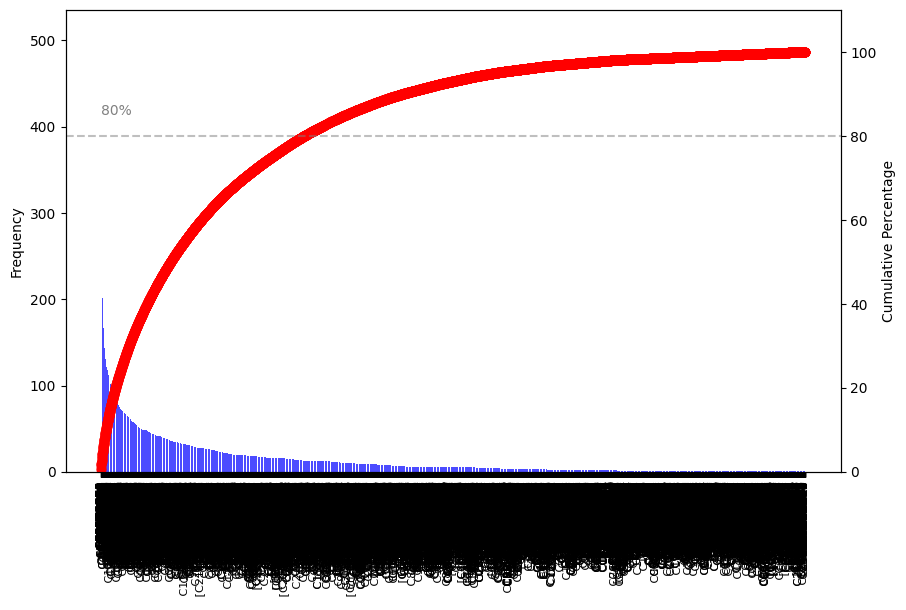

In [7]:
sorted_data = sorted(formulas.items(), key=lambda x : x[1], reverse=True)
labels, values = zip(*sorted_data)

total = sum(values)
cumulative = np.cumsum(values) / total * 100.0

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(labels, values, color='b', alpha=0.7, label='Frequency')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=90)
ax1.set_xticklabels(labels, fontsize=8)

ax2 = ax1.twinx()
ax2.plot(labels, cumulative, color='r', marker='o', linestyle='-', label='Cumulative %')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim([0, 110])
ax2.axhline(y=80, color='gray', linestyle='dashed', alpha=0.5)
ax2.annotate('80%', xy=(0, 80), xytext=(-2, 85), color='gray')

plt.show()